In [1]:
#play around with insightface model.
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from lfw import gen_all_pic_labels
from sklearn.cluster import DBSCAN
from insightface.data import get_image as ins_get_image
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.cluster import KMeans
import umap
from mpl_toolkits.mplot3d import Axes3D


## Load in of the pics-files pairs
## In this notebook, I'm trying to clustering gender info.

In [2]:
pics,names,genders = gen_all_pic_labels('./lfw_funneled/')
#prepare gender
df = pd.DataFrame({'files':pics,'name':names,'gender':genders})

In [10]:
len(genders)

13233

In [4]:
#namely we have 5749 different faces
df.name.value_counts()

George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
                    ... 
Paul_Walker            1
Ewan_McGregor          1
James_Brazelton        1
Ed_Book                1
Michel_Minard          1
Name: name, Length: 5749, dtype: int64

In [6]:
df.gender.value_counts()

male      10271
female     2962
Name: gender, dtype: int64

## We can see that, the number of males are much higher than females, so far we don't do filter, but to see if the clustering algroithm could
## find the inner density un-match

In [124]:
df


,files,name,gender
0,./lfw_funneled/German_Khan/German_Khan_0001.jpg,German_Khan,male
1,./lfw_funneled/Stefano_Gabbana/Stefano_Gabbana...,Stefano_Gabbana,male
2,./lfw_funneled/Dragan_Covic/Dragan_Covic_0001.jpg,Dragan_Covic,male
3,./lfw_funneled/Jeff_Hornacek/Jeff_Hornacek_000...,Jeff_Hornacek,male
4,./lfw_funneled/Sureyya_Ayhan/Sureyya_Ayhan_000...,Sureyya_Ayhan,female
...,...,...,...
13228,./lfw_funneled/Sherry_Fisher/Sherry_Fisher_000...,Sherry_Fisher,female
13229,./lfw_funneled/John_Garamendi/John_Garamendi_0...,John_Garamendi,male
13230,./lfw_funneled/John_Garamendi/John_Garamendi_0...,John_Garamendi,male
13231,./lfw_funneled/Roger_King/Roger_King_0001.jpg,Roger_King,male


In [8]:
#number of points we are going to cluster
num = 500

In [126]:
df

,files,name,gender
0,./lfw_funneled/German_Khan/German_Khan_0001.jpg,German_Khan,male
1,./lfw_funneled/Stefano_Gabbana/Stefano_Gabbana...,Stefano_Gabbana,male
2,./lfw_funneled/Dragan_Covic/Dragan_Covic_0001.jpg,Dragan_Covic,male
3,./lfw_funneled/Jeff_Hornacek/Jeff_Hornacek_000...,Jeff_Hornacek,male
4,./lfw_funneled/Sureyya_Ayhan/Sureyya_Ayhan_000...,Sureyya_Ayhan,female
...,...,...,...
13228,./lfw_funneled/Sherry_Fisher/Sherry_Fisher_000...,Sherry_Fisher,female
13229,./lfw_funneled/John_Garamendi/John_Garamendi_0...,John_Garamendi,male
13230,./lfw_funneled/John_Garamendi/John_Garamendi_0...,John_Garamendi,male
13231,./lfw_funneled/Roger_King/Roger_King_0001.jpg,Roger_King,male


In [7]:
print(df.gender.value_counts())

male      10271
female     2962
Name: gender, dtype: int64


In [103]:
df

,files,name,gender
0,./lfw_funneled/German_Khan/German_Khan_0001.jpg,German_Khan,male
1,./lfw_funneled/Stefano_Gabbana/Stefano_Gabbana...,Stefano_Gabbana,male
2,./lfw_funneled/Dragan_Covic/Dragan_Covic_0001.jpg,Dragan_Covic,male
3,./lfw_funneled/Jeff_Hornacek/Jeff_Hornacek_000...,Jeff_Hornacek,male
6,./lfw_funneled/Bob_Newhart/Bob_Newhart_0001.jpg,Bob_Newhart,male
...,...,...,...
656,./lfw_funneled/Laura_Ziskin/Laura_Ziskin_0001.jpg,Laura_Ziskin,female
659,./lfw_funneled/Marion_Fahnestock/Marion_Fahnes...,Marion_Fahnestock,female
660,./lfw_funneled/Jane_Pauley/Jane_Pauley_0002.jpg,Jane_Pauley,female
661,./lfw_funneled/Jane_Pauley/Jane_Pauley_0001.jpg,Jane_Pauley,female


In [106]:
df.loc[304]

index                                                   308
files     ./lfw_funneled/Charlotte_Rampling/Charlotte_Ra...
name                                     Charlotte_Rampling
gender                                               female
Name: 304, dtype: object

In [9]:
males = df[df.gender=='male'][:num]

In [10]:
females = df[df.gender=='female'][:num]

In [11]:
df  = pd.concat([males,females])

In [12]:
df = df.reset_index()

In [13]:
df

,index,files,name,gender
0,0,./lfw_funneled/German_Khan/German_Khan_0001.jpg,German_Khan,male
1,1,./lfw_funneled/Stefano_Gabbana/Stefano_Gabbana...,Stefano_Gabbana,male
2,2,./lfw_funneled/Dragan_Covic/Dragan_Covic_0001.jpg,Dragan_Covic,male
3,3,./lfw_funneled/Jeff_Hornacek/Jeff_Hornacek_000...,Jeff_Hornacek,male
4,6,./lfw_funneled/Bob_Newhart/Bob_Newhart_0001.jpg,Bob_Newhart,male
...,...,...,...,...
995,1857,./lfw_funneled/Mayumi_Moriyama/Mayumi_Moriyama...,Mayumi_Moriyama,female
996,1858,./lfw_funneled/Sally_Clark/Sally_Clark_0001.jpg,Sally_Clark,female
997,1861,./lfw_funneled/Natalya_Sazanovich/Natalya_Saza...,Natalya_Sazanovich,female
998,1862,./lfw_funneled/Elizabeth_Regan/Elizabeth_Regan...,Elizabeth_Regan,female


In [14]:
#prepare for the face recognizing
embs = np.zeros((num*2,512))
app = FaceAnalysis(name='my')
label = []
gender_label = []
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mafffia/.insightface/models/my/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mafffia/.insightface/models/my/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mafffia/.insightface/models/my/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mafffia/.insightface/models/my/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mafffia/.insightface/models/my/r100.onnx recognition ['None', 3, 112, 112] 0.0 1.0
set det-size: (640, 640)


In [15]:
# pca = PCA(n_components=50)
# newX = pca.fit_transform(X) 
for i in range(num*2):
    pic = df.loc[i]['files']
    name = df.loc[i]['name']
    gender = df.loc[i]['gender']
    label.append(name)
    gender_label.append(gender)
    print(pic,name,gender)
    img = cv2.imread(pic)
    try:
        face_emb = app.get(img)[0]['embedding']
        embs[i,:] = face_emb[:]
    except:
        embs[i,:] = np.zeros((512))

./lfw_funneled/German_Khan/German_Khan_0001.jpg German_Khan male
./lfw_funneled/Stefano_Gabbana/Stefano_Gabbana_0001.jpg Stefano_Gabbana male
./lfw_funneled/Dragan_Covic/Dragan_Covic_0001.jpg Dragan_Covic male
./lfw_funneled/Jeff_Hornacek/Jeff_Hornacek_0001.jpg Jeff_Hornacek male
./lfw_funneled/Bob_Newhart/Bob_Newhart_0001.jpg Bob_Newhart male
./lfw_funneled/Paul_McNulty/Paul_McNulty_0002.jpg Paul_McNulty male
./lfw_funneled/Paul_McNulty/Paul_McNulty_0001.jpg Paul_McNulty male
./lfw_funneled/Jimmy_Iovine/Jimmy_Iovine_0001.jpg Jimmy_Iovine male
./lfw_funneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0002.jpg Ranil_Wickremasinghe male
./lfw_funneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0003.jpg Ranil_Wickremasinghe male
./lfw_funneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg Ranil_Wickremasinghe male
./lfw_funneled/Ben_Chandler/Ben_Chandler_0001.jpg Ben_Chandler male
./lfw_funneled/Mark_Komara/Mark_Komara_0001.jpg Mark_Komara male
./lfw_funneled/Rand_Beers/Rand_Beers_0001

./lfw_funneled/Jesse_Jackson/Jesse_Jackson_0005.jpg Jesse_Jackson male
./lfw_funneled/Jesse_Jackson/Jesse_Jackson_0004.jpg Jesse_Jackson male
./lfw_funneled/Jesse_Jackson/Jesse_Jackson_0006.jpg Jesse_Jackson male
./lfw_funneled/Jesse_Jackson/Jesse_Jackson_0007.jpg Jesse_Jackson male
./lfw_funneled/Jesse_Jackson/Jesse_Jackson_0009.jpg Jesse_Jackson male
./lfw_funneled/Jesse_Jackson/Jesse_Jackson_0008.jpg Jesse_Jackson male
./lfw_funneled/Valorie_Brabazon/Valorie_Brabazon_0001.jpg Valorie_Brabazon male
./lfw_funneled/Rob_Niedermayer/Rob_Niedermayer_0001.jpg Rob_Niedermayer male
./lfw_funneled/Minnie_Mendoza/Minnie_Mendoza_0001.jpg Minnie_Mendoza male
./lfw_funneled/Mark_Rosenbaum/Mark_Rosenbaum_0001.jpg Mark_Rosenbaum male
./lfw_funneled/Stephane_Rousseau/Stephane_Rousseau_0001.jpg Stephane_Rousseau male
./lfw_funneled/Terence_Newman/Terence_Newman_0001.jpg Terence_Newman male
./lfw_funneled/Joseph_Biden/Joseph_Biden_0004.jpg Joseph_Biden male
./lfw_funneled/Joseph_Biden/Joseph_Biden_000

./lfw_funneled/Geovani_Lapentti/Geovani_Lapentti_0001.jpg Geovani_Lapentti male
./lfw_funneled/Jimmy_Lee/Jimmy_Lee_0001.jpg Jimmy_Lee male
./lfw_funneled/Anil_Ramsook/Anil_Ramsook_0001.jpg Anil_Ramsook male
./lfw_funneled/Peter_Mullan/Peter_Mullan_0001.jpg Peter_Mullan male
./lfw_funneled/Herman_Moore/Herman_Moore_0001.jpg Herman_Moore male
./lfw_funneled/Mark_Martin/Mark_Martin_0001.jpg Mark_Martin male
./lfw_funneled/Din_Samsudin/Din_Samsudin_0001.jpg Din_Samsudin male
./lfw_funneled/Jason_Statham/Jason_Statham_0001.jpg Jason_Statham male
./lfw_funneled/Mike_Bair/Mike_Bair_0001.jpg Mike_Bair male
./lfw_funneled/Doug_Racine/Doug_Racine_0001.jpg Doug_Racine male
./lfw_funneled/Chan_Ho_Park/Chan_Ho_Park_0001.jpg Chan_Ho_Park male
./lfw_funneled/Paul_Ebert/Paul_Ebert_0001.jpg Paul_Ebert male
./lfw_funneled/Lee_Nam-shin/Lee_Nam-shin_0001.jpg Lee_Nam-shin male
./lfw_funneled/Crispin_Glover/Crispin_Glover_0001.jpg Crispin_Glover male
./lfw_funneled/Kevin_Marshall/Kevin_Marshall_0001.jpg Kev

./lfw_funneled/Zoran_Djindjic/Zoran_Djindjic_0003.jpg Zoran_Djindjic male
./lfw_funneled/Zoran_Djindjic/Zoran_Djindjic_0002.jpg Zoran_Djindjic male
./lfw_funneled/Zoran_Djindjic/Zoran_Djindjic_0004.jpg Zoran_Djindjic male
./lfw_funneled/Nate_Hybl/Nate_Hybl_0001.jpg Nate_Hybl male
./lfw_funneled/Ed_Case/Ed_Case_0001.jpg Ed_Case male
./lfw_funneled/Stephen_Funk/Stephen_Funk_0001.jpg Stephen_Funk male
./lfw_funneled/John_McEnroe/John_McEnroe_0002.jpg John_McEnroe male
./lfw_funneled/John_McEnroe/John_McEnroe_0001.jpg John_McEnroe male
./lfw_funneled/Walter_Mondale/Walter_Mondale_0008.jpg Walter_Mondale male
./lfw_funneled/Walter_Mondale/Walter_Mondale_0009.jpg Walter_Mondale male
./lfw_funneled/Walter_Mondale/Walter_Mondale_0002.jpg Walter_Mondale male
./lfw_funneled/Walter_Mondale/Walter_Mondale_0003.jpg Walter_Mondale male
./lfw_funneled/Walter_Mondale/Walter_Mondale_0001.jpg Walter_Mondale male
./lfw_funneled/Walter_Mondale/Walter_Mondale_0004.jpg Walter_Mondale male
./lfw_funneled/Wal

./lfw_funneled/Padraig_Harrington/Padraig_Harrington_0004.jpg Padraig_Harrington male
./lfw_funneled/Luke_Smith/Luke_Smith_0001.jpg Luke_Smith male
./lfw_funneled/Jeffrey_Pfeffer/Jeffrey_Pfeffer_0001.jpg Jeffrey_Pfeffer male
./lfw_funneled/Brandon_Boyd/Brandon_Boyd_0001.jpg Brandon_Boyd male
./lfw_funneled/Jim_Jeffords/Jim_Jeffords_0001.jpg Jim_Jeffords male
./lfw_funneled/Claudio_Abbado/Claudio_Abbado_0001.jpg Claudio_Abbado male
./lfw_funneled/Chen_Liang_Yu/Chen_Liang_Yu_0001.jpg Chen_Liang_Yu male
./lfw_funneled/Chen_Liang_Yu/Chen_Liang_Yu_0002.jpg Chen_Liang_Yu male
./lfw_funneled/John_Danforth/John_Danforth_0001.jpg John_Danforth male
./lfw_funneled/Timothy_Goebel/Timothy_Goebel_0001.jpg Timothy_Goebel male
./lfw_funneled/Frank_Sinatra/Frank_Sinatra_0001.jpg Frank_Sinatra male
./lfw_funneled/Masamori_Tokuyama/Masamori_Tokuyama_0001.jpg Masamori_Tokuyama male
./lfw_funneled/Bill_Rainer/Bill_Rainer_0001.jpg Bill_Rainer male
./lfw_funneled/Ken_Watanabe/Ken_Watanabe_0002.jpg Ken_Watan

./lfw_funneled/Holly_Hunter/Holly_Hunter_0006.jpg Holly_Hunter female
./lfw_funneled/Holly_Hunter/Holly_Hunter_0007.jpg Holly_Hunter female
./lfw_funneled/Sophia_Loren/Sophia_Loren_0006.jpg Sophia_Loren female
./lfw_funneled/Sophia_Loren/Sophia_Loren_0007.jpg Sophia_Loren female
./lfw_funneled/Sophia_Loren/Sophia_Loren_0005.jpg Sophia_Loren female
./lfw_funneled/Sophia_Loren/Sophia_Loren_0004.jpg Sophia_Loren female
./lfw_funneled/Sophia_Loren/Sophia_Loren_0001.jpg Sophia_Loren female
./lfw_funneled/Sophia_Loren/Sophia_Loren_0003.jpg Sophia_Loren female
./lfw_funneled/Sophia_Loren/Sophia_Loren_0002.jpg Sophia_Loren female
./lfw_funneled/Whoopi_Goldberg/Whoopi_Goldberg_0001.jpg Whoopi_Goldberg female
./lfw_funneled/Jeane_Kirkpatrick/Jeane_Kirkpatrick_0001.jpg Jeane_Kirkpatrick female
./lfw_funneled/Sue_Grafton/Sue_Grafton_0001.jpg Sue_Grafton female
./lfw_funneled/Jennie_Finch/Jennie_Finch_0001.jpg Jennie_Finch female
./lfw_funneled/Gianna_Angelopoulos-Daskalaki/Gianna_Angelopoulos-Dask

./lfw_funneled/Candice_Beatty/Candice_Beatty_0001.jpg Candice_Beatty female
./lfw_funneled/Julie_Andrews/Julie_Andrews_0001.jpg Julie_Andrews female
./lfw_funneled/Zhang_Ziyi/Zhang_Ziyi_0004.jpg Zhang_Ziyi female
./lfw_funneled/Zhang_Ziyi/Zhang_Ziyi_0002.jpg Zhang_Ziyi female
./lfw_funneled/Zhang_Ziyi/Zhang_Ziyi_0003.jpg Zhang_Ziyi female
./lfw_funneled/Zhang_Ziyi/Zhang_Ziyi_0001.jpg Zhang_Ziyi female
./lfw_funneled/Susan_Walvius/Susan_Walvius_0001.jpg Susan_Walvius female
./lfw_funneled/Kim_Weeks/Kim_Weeks_0001.jpg Kim_Weeks female
./lfw_funneled/Aung_San_Suu_Kyi/Aung_San_Suu_Kyi_0001.jpg Aung_San_Suu_Kyi female
./lfw_funneled/Aung_San_Suu_Kyi/Aung_San_Suu_Kyi_0002.jpg Aung_San_Suu_Kyi female
./lfw_funneled/Shae-Lynn_Bourne/Shae-Lynn_Bourne_0001.jpg Shae-Lynn_Bourne female
./lfw_funneled/Giselle_Estefania_Tavarelli/Giselle_Estefania_Tavarelli_0001.jpg Giselle_Estefania_Tavarelli female
./lfw_funneled/Laura_Ziskin/Laura_Ziskin_0001.jpg Laura_Ziskin female
./lfw_funneled/Marion_Fahnesto

./lfw_funneled/Renee_Zellweger/Renee_Zellweger_0008.jpg Renee_Zellweger female
./lfw_funneled/Renee_Zellweger/Renee_Zellweger_0009.jpg Renee_Zellweger female
./lfw_funneled/Magda_Kertasz/Magda_Kertasz_0001.jpg Magda_Kertasz female
./lfw_funneled/Keiko_Sofia_Fujimori/Keiko_Sofia_Fujimori_0001.jpg Keiko_Sofia_Fujimori female
./lfw_funneled/Ruth_Stubbs/Ruth_Stubbs_0001.jpg Ruth_Stubbs female
./lfw_funneled/Rachel_Griffiths/Rachel_Griffiths_0001.jpg Rachel_Griffiths female
./lfw_funneled/Rachel_Griffiths/Rachel_Griffiths_0003.jpg Rachel_Griffiths female
./lfw_funneled/Rachel_Griffiths/Rachel_Griffiths_0002.jpg Rachel_Griffiths female
./lfw_funneled/Patricia_Clarkson/Patricia_Clarkson_0004.jpg Patricia_Clarkson female
./lfw_funneled/Patricia_Clarkson/Patricia_Clarkson_0001.jpg Patricia_Clarkson female
./lfw_funneled/Patricia_Clarkson/Patricia_Clarkson_0002.jpg Patricia_Clarkson female
./lfw_funneled/Patricia_Clarkson/Patricia_Clarkson_0003.jpg Patricia_Clarkson female
./lfw_funneled/Stacy_D

./lfw_funneled/Eunice_Barber/Eunice_Barber_0002.jpg Eunice_Barber female
./lfw_funneled/Eunice_Barber/Eunice_Barber_0001.jpg Eunice_Barber female
./lfw_funneled/Sadie_Frost/Sadie_Frost_0001.jpg Sadie_Frost female
./lfw_funneled/Sadie_Frost/Sadie_Frost_0003.jpg Sadie_Frost female
./lfw_funneled/Sadie_Frost/Sadie_Frost_0002.jpg Sadie_Frost female
./lfw_funneled/Toni_Jennings/Toni_Jennings_0001.jpg Toni_Jennings female
./lfw_funneled/Rena_Sofer/Rena_Sofer_0001.jpg Rena_Sofer female
./lfw_funneled/Janet_Ecker/Janet_Ecker_0001.jpg Janet_Ecker female
./lfw_funneled/Candice_Bergen/Candice_Bergen_0001.jpg Candice_Bergen female
./lfw_funneled/Candice_Bergen/Candice_Bergen_0002.jpg Candice_Bergen female
./lfw_funneled/Candice_Bergen/Candice_Bergen_0003.jpg Candice_Bergen female
./lfw_funneled/Sandra_Milo/Sandra_Milo_0001.jpg Sandra_Milo female
./lfw_funneled/Kristen_Breitweiser/Kristen_Breitweiser_0001.jpg Kristen_Breitweiser female
./lfw_funneled/Kristen_Breitweiser/Kristen_Breitweiser_0003.jpg

## Clustering with DBSCAN

In [28]:
reducer = umap.UMAP(random_state=42,n_components=25)
face_umap = reducer.fit_transform(embs)
scan = DBSCAN(min_samples=2,eps=0.3).fit(face_umap)
clustering = list(scan.labels_)

out_name = []
out_clu = []

for i in range(len(clustering)):
    if(clustering[i]>=0):
        out_name.append(label[i])
        out_clu.append(clustering[i])

df_out = pd.DataFrame({'real':out_name,'cluster':out_clu})
pd.set_option('display.max_columns',1000)
df_out = df_out.sort_values(by='cluster')
# print(df_out.sort_values(by='real'))
for i in df_out.index:
    print(df_out.loc[i]['cluster'] , '  ' , df_out.loc[i]['real'])
print('total clustered points :%d'%len(out_name))

0    Gloria_Macapagal_Arroyo
0    Gloria_Macapagal_Arroyo
0    Gloria_Macapagal_Arroyo
0    Gloria_Macapagal_Arroyo
1    Amelie_Mauresmo
1    Amelie_Mauresmo
2    Roger_Moore
2    Roger_Moore
3    Gordon_Brown
3    Gordon_Brown
3    Gordon_Brown
4    Pat_Cox
4    Toby_Keith
4    Dominic_Monaghan
4    Ai_Sugiyama
5    Serena_Williams
5    Serena_Williams
5    Serena_Williams
5    Serena_Williams
6    Gerhard_Schroeder
6    Gerhard_Schroeder
6    Gerhard_Schroeder
6    Gerhard_Schroeder
6    Gerhard_Schroeder
6    Gerhard_Schroeder
6    Kim_Ryong-sung
6    Gerhard_Schroeder
6    Gerhard_Schroeder
6    Kim_Ryong-sung
6    Gerhard_Schroeder
7    Justin_Timberlake
7    Justin_Timberlake
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    George_W_Bush
8    

## Cluster with T-sne

In [55]:

face_umap = TSNE(n_components=2).fit_transform(embs)
scan = DBSCAN(min_samples=2,eps=25).fit(face_umap)
# scan = KMeans(n_clusters=2, random_state=0).fit(face_umap)
clustering = list(scan.labels_)

out_name = []
out_clu = []
out_gender = []
for i in range(len(clustering)):
    if(clustering[i]>=0):
        out_name.append(label[i])
        out_clu.append(clustering[i])
        out_gender.append(gender_label[i])
df_out = pd.DataFrame({'real':out_name,'cluster':out_clu,'gender':out_gender})
pd.set_option('display.max_columns',1000)
df_out = df_out.sort_values(by='cluster')
# print(df_out.sort_values(by='real'))
for i in df_out.index:
    print(df_out.loc[i]['cluster'] , '  ' , df_out.loc[i]['real'],'  ' , df_out.loc[i]['gender'] )
print('total clustered points :%d'%len(out_name))

/Users/mafffia/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mafffia/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0    Gloria_Macapagal_Arroyo    female
0    Todd_Robbins    male
0    Monica_Seles    female
0    Cristiano_da_Matta    male
0    Doug_Moe    male
0    Elijah_Wood    male
0    Taylyn_Solomon    male
0    Jose_Serra    male
0    Michael_Schumacher    male
0    Naji_Sabri    male
0    George_W_Bush    male
0    Johan_Bruyneel    male
0    Carla_Sullivan    female
0    Michael_Kostelnik    male
0    Len_Jenoff    male
0    Carolyn_Dawn_Johnson    female
0    Mahathir_Mohamad    male
0    Scott_Sullivan    male
0    Edmund_Stoiber    male
0    Gerhard_Schroeder    male
0    Jessica_Lange    female
0    Bernice_Wong    female
0    Jeb_Bush    male
0    Luiz_Felipe_Scolari    male
0    Ariel_Sharon    male
0    Carlos_Menem    male
0    Aaron_Pena    male
0    John_Lithgow    male
0    Mike_Smith    male
0    Mark_Leno    male
0    Nia_Vardalos    female
0    Rob_Lowe    male
0    Carlos_Moya    male
0    Nancy_Pelosi    female
0    Fernando_Henrique_Cardoso    male
0    Junichiro_Koizumi  

/Users/mafffia/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mafffia/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


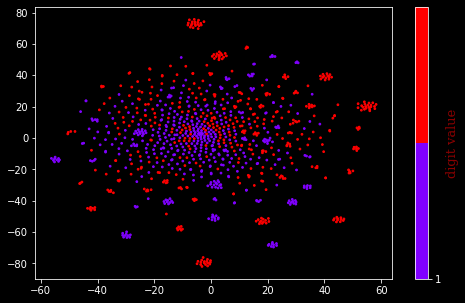

In [25]:
#pca = PCA(n_components=200, svd_solver='full')
#face_umap = pca.fit_transform(embs)
face_umap = TSNE(n_components=2).fit_transform(embs)
font = {'color':'darkred',"size":13,"family":"serif"}
plt.style.use("dark_background")
plt.figure(figsize=(8,5))
color = []
for item in gender_label:
    if(item=='male'):
        color.append(1)
    else:
        color.append(2)
plt.scatter(face_umap[:,0],face_umap[:,1],c=color,alpha=1,s=3,cmap=plt.cm.get_cmap('rainbow',2))
cbar = plt.colorbar(ticks=range(2))
cbar.set_label(label="digit value",fontdict=font)
# plt.clim(-0.5,9.5)


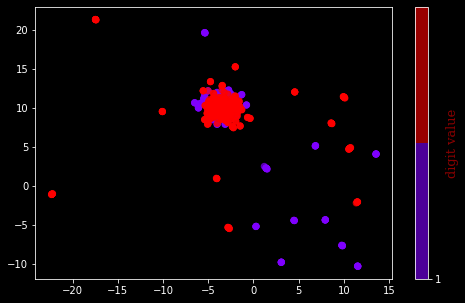

In [17]:
pca = PCA(n_components=30, svd_solver='full')
face_umap = pca.fit_transform(embs)
reducer = umap.UMAP(random_state=42,n_components=2)

face_umap = reducer.fit_transform(face_umap)
font = {'color':'darkred',"size":13,"family":"serif"}
plt.style.use("dark_background")
plt.figure(figsize=(8,5))
color = []
for item in gender_label:
    if(item=='male'):
        color.append(1)
    else:
        color.append(2)
plt.scatter(face_umap[:,0],face_umap[:,1],c=color,alpha=0.6,cmap=plt.cm.get_cmap('rainbow',2))
cbar = plt.colorbar(ticks=range(2))
cbar.set_label(label="digit value",fontdict=font)
# plt.clim(-0.5,9.5)


## Clustering with OPTICS

In [142]:
reducer = umap.UMAP(random_state=42,n_components=30)
face_umap = reducer.fit_transform(embs)
scan = OPTICS(min_samples=2,metric='cosine').fit(face_umap)
clustering = list(scan.labels_)

out_name = []
out_clu = []

for i in range(len(clustering)):
    if(clustering[i]>=0):
        out_name.append(label[i])
        out_clu.append(clustering[i])

df_out = pd.DataFrame({'real':out_name,'cluster':out_clu})
pd.set_option('display.max_columns',1000)
df_out = df_out.sort_values(by='cluster')
# print(df_out.sort_values(by='real'))
for i in df_out.index:
    print(df_out.loc[i]['cluster'] , '  ' , df_out.loc[i]['real'])
print('total clustered points :%d'%len(out_name))

0    Brock_Berlin
0    Terence_Newman
1    Vin_Diesel
1    Vin_Diesel
1    Clay_Campbell
2    Raul_Gonzalez
2    Stephane_Rousseau
3    Bill_Byrne
3    Alex_Popov
4    Peter_Hartz
4    Giovanny_Cordoba
4    Taylor_Twellman
5    Wolfgang_Schwarz
5    Saoud_Al_Faisal
6    David_Howard
6    Hermogenes_Ebdane_Jr
6    Billy_Bob_Thornton
6    Brett_Perry
6    Hutomo_Mandala_Putra
7    Nicolas_Massu
7    Kaisser_Bazan
8    Alberto_Acosta
8    Eric_Schacht
8    Glenn_Rivers
9    Mike_Bair
9    Peter_Mullan
10    Tayshaun_Prince
10    David_Zeplowitz
10    Crispin_Glover
10    Chris_Cornell
11    Nawabzada_Nasrullah_Khan
11    Matt_Morris
11    Soenarno
12    Dick_Smothers
12    Kim_Dong-hwa
13    Paul_Tracy
13    Leuris_Pupo
13    Ed_Case
13    Max_Baucus
14    Isaiah_Washington
14    Isaiah_Washington
14    Hussein_Malik
15    Walt_Harris
15    Woodrow_Stanley
15    Bobby_Bowden
15    Mike_Richter
16    Michael_Goldrich
16    Yuvraj_Singh
16    Bill_Butler
17    Danny_Glover
17    Darren_Clar

In [65]:
face_umap[:,1].reshape(1,-1).shape

(1, 1000)

In [73]:
scan.labels_.shape

(1000,)